Random Forest Classifier Evaluation:
Accuracy: 0.9233
Precision: 0.9026
Recall: 0.9456
F1 Score: 0.9236

Confusion Matrix:
[[138  15]
 [  8 139]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.90      0.92       153
           1       0.90      0.95      0.92       147

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300


Feature Importance:
       Feature  Importance
5    Feature 6    0.162093
12  Feature 13    0.112155
15  Feature 16    0.093250
2    Feature 3    0.086770
3    Feature 4    0.071102
16  Feature 17    0.063448
14  Feature 15    0.054750
7    Feature 8    0.050014
10  Feature 11    0.046708
18  Feature 19    0.044909
0    Feature 1    0.039208
19  Feature 20    0.032551
17  Feature 18    0.019653
6    Feature 7    0.018589
13  Feature 14    0.018346
9   Feature 10    0.018103
8    Feature 9    0.017

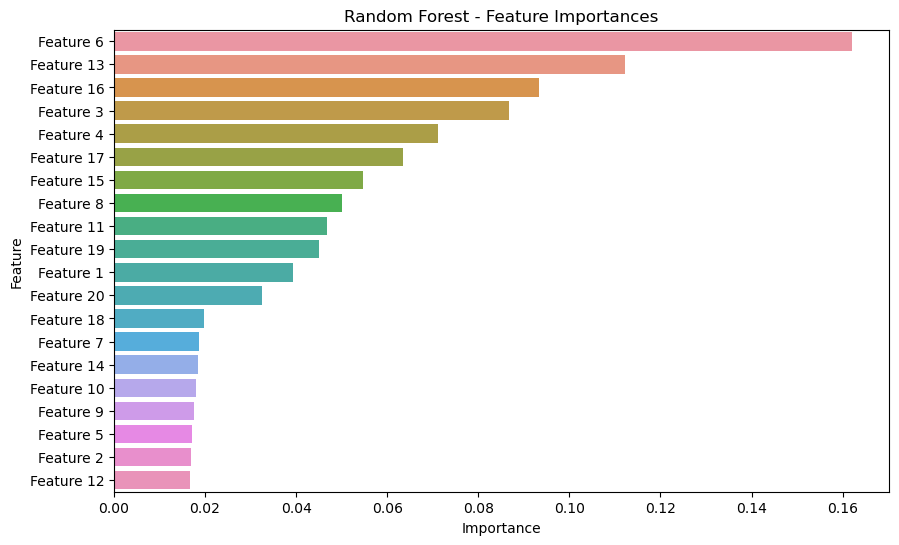

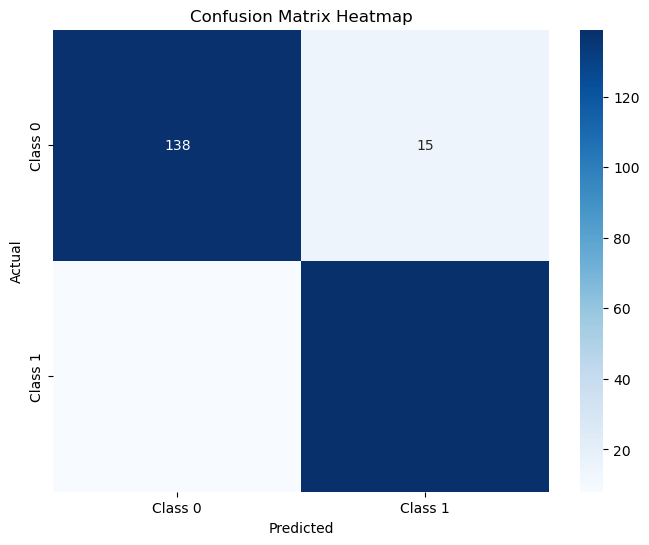

In [2]:
#Random forest classifier
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.datasets import make_classification
import seaborn as sns


X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, n_classes=2, random_state=42)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

#training of model is being done
rf_classifier.fit(X_train, y_train)


y_pred = rf_classifier.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)


print(f"Random Forest Classifier Evaluation:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)


print("\nClassification Report:")
print(classification_report(y_test, y_pred))


feature_importances = rf_classifier.feature_importances_
features = [f"Feature {i+1}" for i in range(X.shape[1])]


importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importance:")
print(importance_df)


plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=importance_df)
plt.title("Random Forest - Feature Importances")
plt.show()


plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
